<a href="https://colab.research.google.com/github/Barinblaq/Master-Thesis/blob/main/Master_Thesis_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries 

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## Importing Dataset 

In [4]:
import glob

path = r'/content/sample_data/Signal A' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=None)
    li.append(df)

df_A = pd.concat(li, axis=0, ignore_index=True)
df_A = df_A.drop(columns=[0, 1, 2, 3, 4, 5])

In [5]:
path = r'/content/sample_data/Signal G' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=None)
    li.append(df)

df_G = pd.concat(li, axis=0, ignore_index=True)
df_G = df_G.drop(columns=[0, 1, 2, 3, 4, 5])

In [6]:
df_A

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,...,3366,3367,3368,3369,3370,3371,3372,3373,3374,3375,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393,3394,3395,3396,3397,3398,3399,3400,3401,3402,3403,3404,3405
0,-0.001408,-0.001024,-0.001024,-0.001664,-0.002304,-0.001664,-0.001920,-0.001280,-0.000512,-0.000896,-0.001024,-0.000768,-0.001280,-0.001024,-0.001024,-0.001408,-0.002816,-0.002560,-0.000640,0.000128,0.002816,0.002304,0.000512,-0.000128,-0.000896,-0.001408,-0.002048,-0.001792,-0.001792,-0.001408,-0.001408,-0.001920,-0.001536,-0.001280,-0.001408,-0.001152,-0.000896,-0.001024,-0.000768,-0.000384,...,-0.005504,-0.007039,-0.008191,-0.009727,-0.009983,-0.010879,-0.011903,-0.012671,-0.012671,-0.012543,-0.012415,-0.012159,-0.012159,-0.011519,-0.011007,-0.010239,-0.009471,-0.007679,-0.006527,-0.004992,-0.002944,-0.001408,0.000384,0.001792,0.002688,0.004608,0.005632,0.007039,0.007679,0.008703,0.008831,0.009855,0.009727,0.009727,0.009599,0.009343,0.009343,0.008703,0.008447,0.007039
1,-0.000768,-0.000896,-0.000640,-0.000640,-0.000896,-0.001152,-0.001536,-0.002048,-0.001664,-0.001408,-0.001920,-0.001792,-0.001536,-0.001792,-0.001664,-0.002816,-0.002432,-0.000128,-0.000256,0.002688,0.001536,0.000640,-0.000128,-0.001280,-0.001664,-0.001920,-0.002048,-0.001536,-0.001024,-0.001536,-0.001536,-0.001280,-0.000896,-0.001792,-0.001664,-0.001920,-0.002048,-0.001536,-0.001664,-0.001792,...,-0.005248,-0.006911,-0.008191,-0.009087,-0.010111,-0.011263,-0.011263,-0.011519,-0.012031,-0.011903,-0.011903,-0.011775,-0.011647,-0.011775,-0.011263,-0.010111,-0.008191,-0.006527,-0.004992,-0.003456,-0.002176,-0.000384,0.001280,0.002560,0.003968,0.004864,0.005248,0.006271,0.006783,0.007423,0.008447,0.008191,0.008063,0.008319,0.008831,0.009215,0.008959,0.008319,0.007679,0.007039
2,-0.001792,-0.001792,-0.001280,-0.000768,-0.000896,-0.000640,-0.000384,-0.000896,-0.001408,-0.001664,-0.001920,-0.002048,-0.002048,-0.002304,-0.001536,-0.001152,-0.001024,-0.000768,-0.002048,-0.002304,-0.000384,0.000256,0.002944,0.001408,0.000128,-0.000512,-0.001152,-0.001664,-0.001536,-0.001536,-0.001664,-0.001280,-0.001536,-0.001792,-0.001664,-0.002304,-0.002432,-0.002048,-0.001792,-0.001536,...,-0.003840,-0.005760,-0.007423,-0.008447,-0.009727,-0.010367,-0.011135,-0.011903,-0.012927,-0.013311,-0.013311,-0.013183,-0.012671,-0.012287,-0.011647,-0.010751,-0.009471,-0.008959,-0.007935,-0.006527,-0.004736,-0.002944,-0.001024,0.000256,0.001664,0.003072,0.004352,0.005504,0.005632,0.006911,0.007807,0.009087,0.010239,0.010495,0.010367,0.010111,0.008959,0.008703,0.008447,0.007551
3,0.000000,-0.000128,-0.000384,-0.000896,-0.001152,-0.001408,-0.001792,-0.002304,-0.001920,-0.001536,-0.001664,-0.001664,-0.001408,-0.001280,-0.001024,-0.002304,-0.003456,-0.001280,-0.000768,0.000896,0.001152,0.000128,-0.001152,-0.001536,-0.001792,-0.001408,-0.001920,-0.002304,-0.001792,-0.001792,-0.001664,-0.001792,-0.001536,-0.002048,-0.001920,-0.001792,-0.001920,-0.001536,-0.001152,-0.001664,...,-0.004352,-0.004864,-0.006144,-0.007295,-0.008959,-0.010239,-0.011007,-0.011647,-0.011519,-0.011903,-0.012159,-0.012031,-0.011647,-0.011263,-0.010751,-0.009599,-0.008319,-0.006783,-0.006144,-0.004352,-0.003200,-0.002048,-0.001152,0.000128,0.001664,0.003200,0.003968,0.005120,0.006399,0.007295,0.008063,0.008959,0.009087,0.009599,0.009471,0.008831,0.008959,0.008575,0.007295,0.006911
4,-0.000512,-0.000640,-0.001280,-0.001536,-0.001536,-0.001408,-0.001280,-0.001408,-0.001024,-0.001152,-0.001024,-0.000896,-0.000768,-0.000768,-0.000512,-0.000512,-0.001408,-0.002688,-0.001408,-0.000768,0.001664,0.002048,0.000768,0.000512,-0.000256,-0.001408,-0.001408,-0.001920,-0.001920,-0.001024,-0.000896,-0.001024,-0.001280,-0.002048,-0.001664,-0.001536,-0.001920,-0.002560,-0.002304,-0.001920,...,-0.004224,-0.005248,-0.007039,-0.008319,-0.008959,-0.009471,-0.010367,-0.011007,-0.011903,-0.012031,-0.011519,-0.011263,-0.011135,-0.01023

In [7]:
df_G

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,...,3366,3367,3368,3369,3370,3371,3372,3373,3374,3375,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393,3394,3395,3396,3397,3398,3399,3400,3401,3402,3403,3404,3405
0,-0.002688,-0.002688,-0.002304,-0.002688,-0.002560,-0.002816,-0.003328,-0.002944,-0.003072,-0.003712,-0.004480,-0.004864,-0.005120,-0.005504,-0.006783,-0.007551,-0.008191,-0.008831,-0.008831,-0.008575,-0.009215,-0.009855,-0.009855,-0.010751,-0.010495,-0.010239,-0.009599,-0.008959,-0.008191,-0.007423,-0.007679,-0.007295,-0.006655,-0.006527,-0.006144,-0.005120,-0.004736,-0.004224,-0.003840,-0.002944,...,0.010367,0.009599,0.008703,0.007551,0.006016,0.004096,0.002944,0.000896,-0.000256,-0.001664,-0.002688,-0.003840,-0.004864,-0.006655,-0.008703,-0.009983,-0.011007,-0.011519,-0.011903,-0.011647,-0.011263,-0.011007,-0.010239,-0.009599,-0.009599,-0.008959,-0.008063,-0.006783,-0.005632,-0.003968,-0.002432,-0.001280,0.001152,0.001920,0.003200,0.004352,0.005504,0.006911,0.008063,0.009215
1,0.000512,0.000640,-0.000768,-0.001280,-0.001408,-0.001920,-0.002688,-0.003328,-0.003584,-0.003968,-0.004096,-0.004480,-0.004608,-0.004992,-0.005248,-0.004864,-0.004224,-0.004224,-0.003840,-0.003968,-0.003840,-0.003072,-0.002944,-0.002944,-0.001920,-0.001664,-0.001792,-0.001920,-0.001024,-0.000512,0.000000,0.000640,0.000640,0.000512,0.001152,0.001536,0.001408,0.001536,0.001536,0.000896,...,0.007935,0.007551,0.006783,0.004992,0.003712,0.002816,0.001536,0.000512,-0.001408,-0.003200,-0.004480,-0.005376,-0.006399,-0.007807,-0.008703,-0.009087,-0.009855,-0.010239,-0.010495,-0.010751,-0.011135,-0.010751,-0.010623,-0.010623,-0.009727,-0.009599,-0.009215,-0.008447,-0.007551,-0.005760,-0.004096,-0.002432,-0.000768,0.001024,0.002560,0.003200,0.004096,0.005120,0.005760,0.006783
2,-0.003456,-0.003200,-0.002304,-0.001664,-0.001408,-0.001152,-0.000384,0.001024,0.001408,0.001152,0.001280,0.001536,0.001664,0.001792,0.002176,0.002304,0.002432,0.002560,0.001792,0.001152,0.000768,0.000384,-0.000384,-0.000256,-0.000384,-0.001024,-0.001152,-0.001024,-0.001280,-0.002560,-0.002176,-0.002432,-0.002944,-0.002944,-0.003840,-0.004224,-0.004480,-0.004480,-0.004096,-0.004608,...,-0.013439,-0.012543,-0.011903,-0.011519,-0.010751,-0.009855,-0.009087,-0.007679,-0.006527,-0.005248,-0.004096,-0.003456,-0.002560,-0.001792,-0.000896,0.000000,0.000640,0.001280,0.001408,0.001536,0.001792,0.001664,0.001664,0.001792,0.001152,0.000384,-0.000640,-0.001664,-0.002944,-0.003328,-0.004480,-0.005888,-0.007551,-0.008191,-0.009215,-0.011007,-0.011391,-0.012415,-0.012799,-0.012799
3,-0.003840,-0.003200,-0.002688,-0.001920,-0.001536,-0.000640,-0.000128,0.000256,0.001152,0.001408,0.002176,0.002176,0.002560,0.002688,0.002944,0.002304,0.002688,0.002816,0.003072,0.002688,0.002176,0.001792,0.001536,0.001280,0.001152,0.000512,0.000256,-0.000640,-0.001664,-0.001920,-0.002560,-0.003328,-0.003072,-0.002688,-0.003328,-0.003840,-0.004480,-0.004608,-0.003968,-0.003456,...,-0.007807,-0.007039,-0.005760,-0.004736,-0.004224,-0.003456,-0.002304,-0.001024,-0.000384,0.000640,0.001280,0.002560,0.003584,0.004224,0.005120,0.005504,0.007167,0.007679,0.007551,0.007423,0.006911,0.006271,0.005760,0.005120,0.004352,0.004352,0.004096,0.002944,0.001536,-0.000384,-0.001536,-0.002176,-0.003456,-0.004352,-0.005248,-0.006016,-0.006655,-0.007423,-0.008191,-0.009087
4,0.001920,0.001920,0.002304,0.002304,0.002304,0.002048,0.000768,-0.000256,-0.000640,-0.001408,-0.002304,-0.002816,-0.002944,-0.003584,-0.003840,-0.004096,-0.004608,-0.005120,-0.005248,-0.005760,-0.006016,-0.005760,-0.005504,-0.005248,-0.004480,-0.003712,-0.003712,-0.003328,-0.002816,-0.001920,-0.001152,-0.000512,0.000000,0.000000,0.000768,0.001536,0.002560,0.002688,0.002560,0.002688,...,0.007295,0.006527,0.006016,0.004352,0.002816,0.001152,-0.000384,-0.002048,-0.002560,-0.003456,-0.004736,-0.006399,-0.007679,-0.008319,-0.009087,-0.009599,-0.010239,-0.010495

## Dataset description

In [8]:
# Parking Echos data description with stats 
sum(df_A.count()==150)

3400

In [9]:
# Wall Echos data description with stats 
df_G.describe()

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,...,3366,3367,3368,3369,3370,3371,3372,3373,3374,3375,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393,3394,3395,3396,3397,3398,3399,3400,3401,3402,3403,3404,3405
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,-0.001428,-0.001357,-0.001258,-0.001167,-0.001051,-0.000914,-0.000901,-0.000914,-0.000862,-0.000854,-0.000898,-0.000824,-0.000793,-0.000837,-0.000891,-0.000925,-0.001016,-0.001088,-0.001143,-0.001265,-0.001387,-0.001384,-0.001400,-0.001496,-0.001555,-0.001604,-0.001693,-0.001698,-0.001697,-0.001697,-0.001715,-0.001670,-0.001645,-0.001640,-0.001458,-0.001344,-0.001311,-0.001298,-0.001329,-0.001425,...,-0.001405,-0.001388,-0.001339,-0.001399,-0.001394,-0.001356,-0.001385,-0.001437,-0.001464,-0.001466,-0.001432,-0.001339,-0.001286,-0.001322,-0.001343,-0.001400,-0.001427,-0.001453,-0.001490,-0.001480,-0.001442,-0.001434,-0.001415,-0.001387,-0.001378,-0.001391,-0.001394,-0.001343,-0.001286,-0.001290,-0.001346,-0.001382,-0.001355,-0.001393,-0.001396,-0.001407,-0.001341,-0.001319,-0.001345,-0.001284
std,0.002043,0.001948,0.001764,0.001610,0.001561,0.001632,0.001686,0.001756,0.001785,0.001906,0.001959,0.002061,0.002214,0.002368,0.002447,0.002503,0.002608,0.002649,0.002584,0.002465,0.002366,0.002260,0.002207,0.002134,0.002000,0.001881,0.001745,0.001639,0.001611,0.001601,0.001694,0.001813,0.001978,0.001997,0.002045,0.002126,0.002227,0.002252,0.002244,0.002315,...,0.005401,0.005130,0.004792,0.004414,0.004017,0.003663,0.003345,0.003038,0.002927,0.002982,0.003213,0.003536,0.003924,0.004319,0.004629,0.004936,0.005245,0.005492,0.005609,0.005660,0.005769,0.005717,0.005572,0.005380,0.005092,0.004740,0.004370,0.004023,0.003637,0.003345,0.003044,0.002961,0.003000,0.003193,0.003486,0.003824,0.004232,0.004684,0.005162,0.005406
min,-0.007551,-0.007679,-0.007551,-0.006783,-0.006144,-0.006783,-0.006783,-0.006783,-0.007039,-0.007039,-0.006911,-0.007679,-0.008319,-0.009087,-0.009727,-0.009727,-0.010239,-0.009727,-0.009087,-0.008831,-0.009215,-0.009855,-0.010239,-0.010879,-0.011007,-0.011007,-0.010111,-0.009727,-0.009087,-0.008703,-0.008319,-0.008319,-0.007807,-0.007807,-0.007039,-0.007295,-0.007551,-0.008447,-0.007935,-0.007807,...,-0.013439,-0.012543,-0.011903,-0.011519,-0.010751,-0.009855,-0.009087,-0.009855,-0.010367,-0.010879,-0.010495,-0.010879,-0.011263,-0.011391,-0.011263,-0.011263,-0.012415,-0.012927,-0.013311,-0.013695,-0.013567,-0.012671,-0.012799,-0.012799,-0.013055,-0.013311,-0.013055,-0.013695,-0.013311,-0.013567,-0.013567,-0.014079,-0.013567,-0.013183,-0.012927,-0.011647,-0.011775,-0.012415,-0.012799,-0.013055
25%,-0.002816,-0.002688,-0.002432,-0.002048,-0.001792,-0.001664,-0.001664,-0.001920,-0.002048,-0.002080,-0.002304,-0.002304,-0.002336,-0.002816,-0.002816,-0.002688,-0.002720,-0.002688,-0.002464,-0.002208,-0.002304,-0.002336,-0.002432,-0.002688,-0.002560,-0.002688,-0.002720,-0.002560,-0.002560,-0.002560,-0.002688,-0.002816,-0.002944,-0.002944,-0.002816,-0.002944,-0.003072,-0.003200,-0.003072,-0.003456,...,-0.004128,-0.004224,-0.004160,-0.004

## Dataset Visualization 

In [10]:
dfs= []
dfs.append(df_A)
dfs.append(df_G)
df = pd.concat(dfs, axis=0, ignore_index=True)
df

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,...,3366,3367,3368,3369,3370,3371,3372,3373,3374,3375,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393,3394,3395,3396,3397,3398,3399,3400,3401,3402,3403,3404,3405
0,-0.001408,-0.001024,-0.001024,-0.001664,-0.002304,-0.001664,-0.001920,-0.001280,-0.000512,-0.000896,-0.001024,-0.000768,-0.001280,-0.001024,-0.001024,-0.001408,-0.002816,-0.002560,-0.000640,0.000128,0.002816,0.002304,0.000512,-0.000128,-0.000896,-0.001408,-0.002048,-0.001792,-0.001792,-0.001408,-0.001408,-0.001920,-0.001536,-0.001280,-0.001408,-0.001152,-0.000896,-0.001024,-0.000768,-0.000384,...,-0.005504,-0.007039,-0.008191,-0.009727,-0.009983,-0.010879,-0.011903,-0.012671,-0.012671,-0.012543,-0.012415,-0.012159,-0.012159,-0.011519,-0.011007,-0.010239,-0.009471,-0.007679,-0.006527,-0.004992,-0.002944,-0.001408,0.000384,0.001792,0.002688,0.004608,0.005632,0.007039,0.007679,0.008703,0.008831,0.009855,0.009727,0.009727,0.009599,0.009343,0.009343,0.008703,0.008447,0.007039
1,-0.000768,-0.000896,-0.000640,-0.000640,-0.000896,-0.001152,-0.001536,-0.002048,-0.001664,-0.001408,-0.001920,-0.001792,-0.001536,-0.001792,-0.001664,-0.002816,-0.002432,-0.000128,-0.000256,0.002688,0.001536,0.000640,-0.000128,-0.001280,-0.001664,-0.001920,-0.002048,-0.001536,-0.001024,-0.001536,-0.001536,-0.001280,-0.000896,-0.001792,-0.001664,-0.001920,-0.002048,-0.001536,-0.001664,-0.001792,...,-0.005248,-0.006911,-0.008191,-0.009087,-0.010111,-0.011263,-0.011263,-0.011519,-0.012031,-0.011903,-0.011903,-0.011775,-0.011647,-0.011775,-0.011263,-0.010111,-0.008191,-0.006527,-0.004992,-0.003456,-0.002176,-0.000384,0.001280,0.002560,0.003968,0.004864,0.005248,0.006271,0.006783,0.007423,0.008447,0.008191,0.008063,0.008319,0.008831,0.009215,0.008959,0.008319,0.007679,0.007039
2,-0.001792,-0.001792,-0.001280,-0.000768,-0.000896,-0.000640,-0.000384,-0.000896,-0.001408,-0.001664,-0.001920,-0.002048,-0.002048,-0.002304,-0.001536,-0.001152,-0.001024,-0.000768,-0.002048,-0.002304,-0.000384,0.000256,0.002944,0.001408,0.000128,-0.000512,-0.001152,-0.001664,-0.001536,-0.001536,-0.001664,-0.001280,-0.001536,-0.001792,-0.001664,-0.002304,-0.002432,-0.002048,-0.001792,-0.001536,...,-0.003840,-0.005760,-0.007423,-0.008447,-0.009727,-0.010367,-0.011135,-0.011903,-0.012927,-0.013311,-0.013311,-0.013183,-0.012671,-0.012287,-0.011647,-0.010751,-0.009471,-0.008959,-0.007935,-0.006527,-0.004736,-0.002944,-0.001024,0.000256,0.001664,0.003072,0.004352,0.005504,0.005632,0.006911,0.007807,0.009087,0.010239,0.010495,0.010367,0.010111,0.008959,0.008703,0.008447,0.007551
3,0.000000,-0.000128,-0.000384,-0.000896,-0.001152,-0.001408,-0.001792,-0.002304,-0.001920,-0.001536,-0.001664,-0.001664,-0.001408,-0.001280,-0.001024,-0.002304,-0.003456,-0.001280,-0.000768,0.000896,0.001152,0.000128,-0.001152,-0.001536,-0.001792,-0.001408,-0.001920,-0.002304,-0.001792,-0.001792,-0.001664,-0.001792,-0.001536,-0.002048,-0.001920,-0.001792,-0.001920,-0.001536,-0.001152,-0.001664,...,-0.004352,-0.004864,-0.006144,-0.007295,-0.008959,-0.010239,-0.011007,-0.011647,-0.011519,-0.011903,-0.012159,-0.012031,-0.011647,-0.011263,-0.010751,-0.009599,-0.008319,-0.006783,-0.006144,-0.004352,-0.003200,-0.002048,-0.001152,0.000128,0.001664,0.003200,0.003968,0.005120,0.006399,0.007295,0.008063,0.008959,0.009087,0.009599,0.009471,0.008831,0.008959,0.008575,0.007295,0.006911
4,-0.000512,-0.000640,-0.001280,-0.001536,-0.001536,-0.001408,-0.001280,-0.001408,-0.001024,-0.001152,-0.001024,-0.000896,-0.000768,-0.000768,-0.000512,-0.000512,-0.001408,-0.002688,-0.001408,-0.000768,0.001664,0.002048,0.000768,0.000512,-0.000256,-0.001408,-0.001408,-0.001920,-0.001920,-0.001024,-0.000896,-0.001024,-0.001280,-0.002048,-0.001664,-0.001536,-0.001920,-0.002560,-0.002304,-0.001920,...,-0.004224,-0.005248,-0.007039,-0.008319,-0.008959,-0.009471,-0.010367,-0.011007,-0.011903,-0.012031,-0.011519,-0.011263,-0.011135,-0.01023

In [11]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(3)
# No missing values in dataset

,Total,Percent
3405,0,0.0
1147,0,0.0
1145,0,0.0


In [12]:
plt.figure(figsize=(30,30))
df_corr = df.corr()

<Figure size 2160x2160 with 0 Axes>

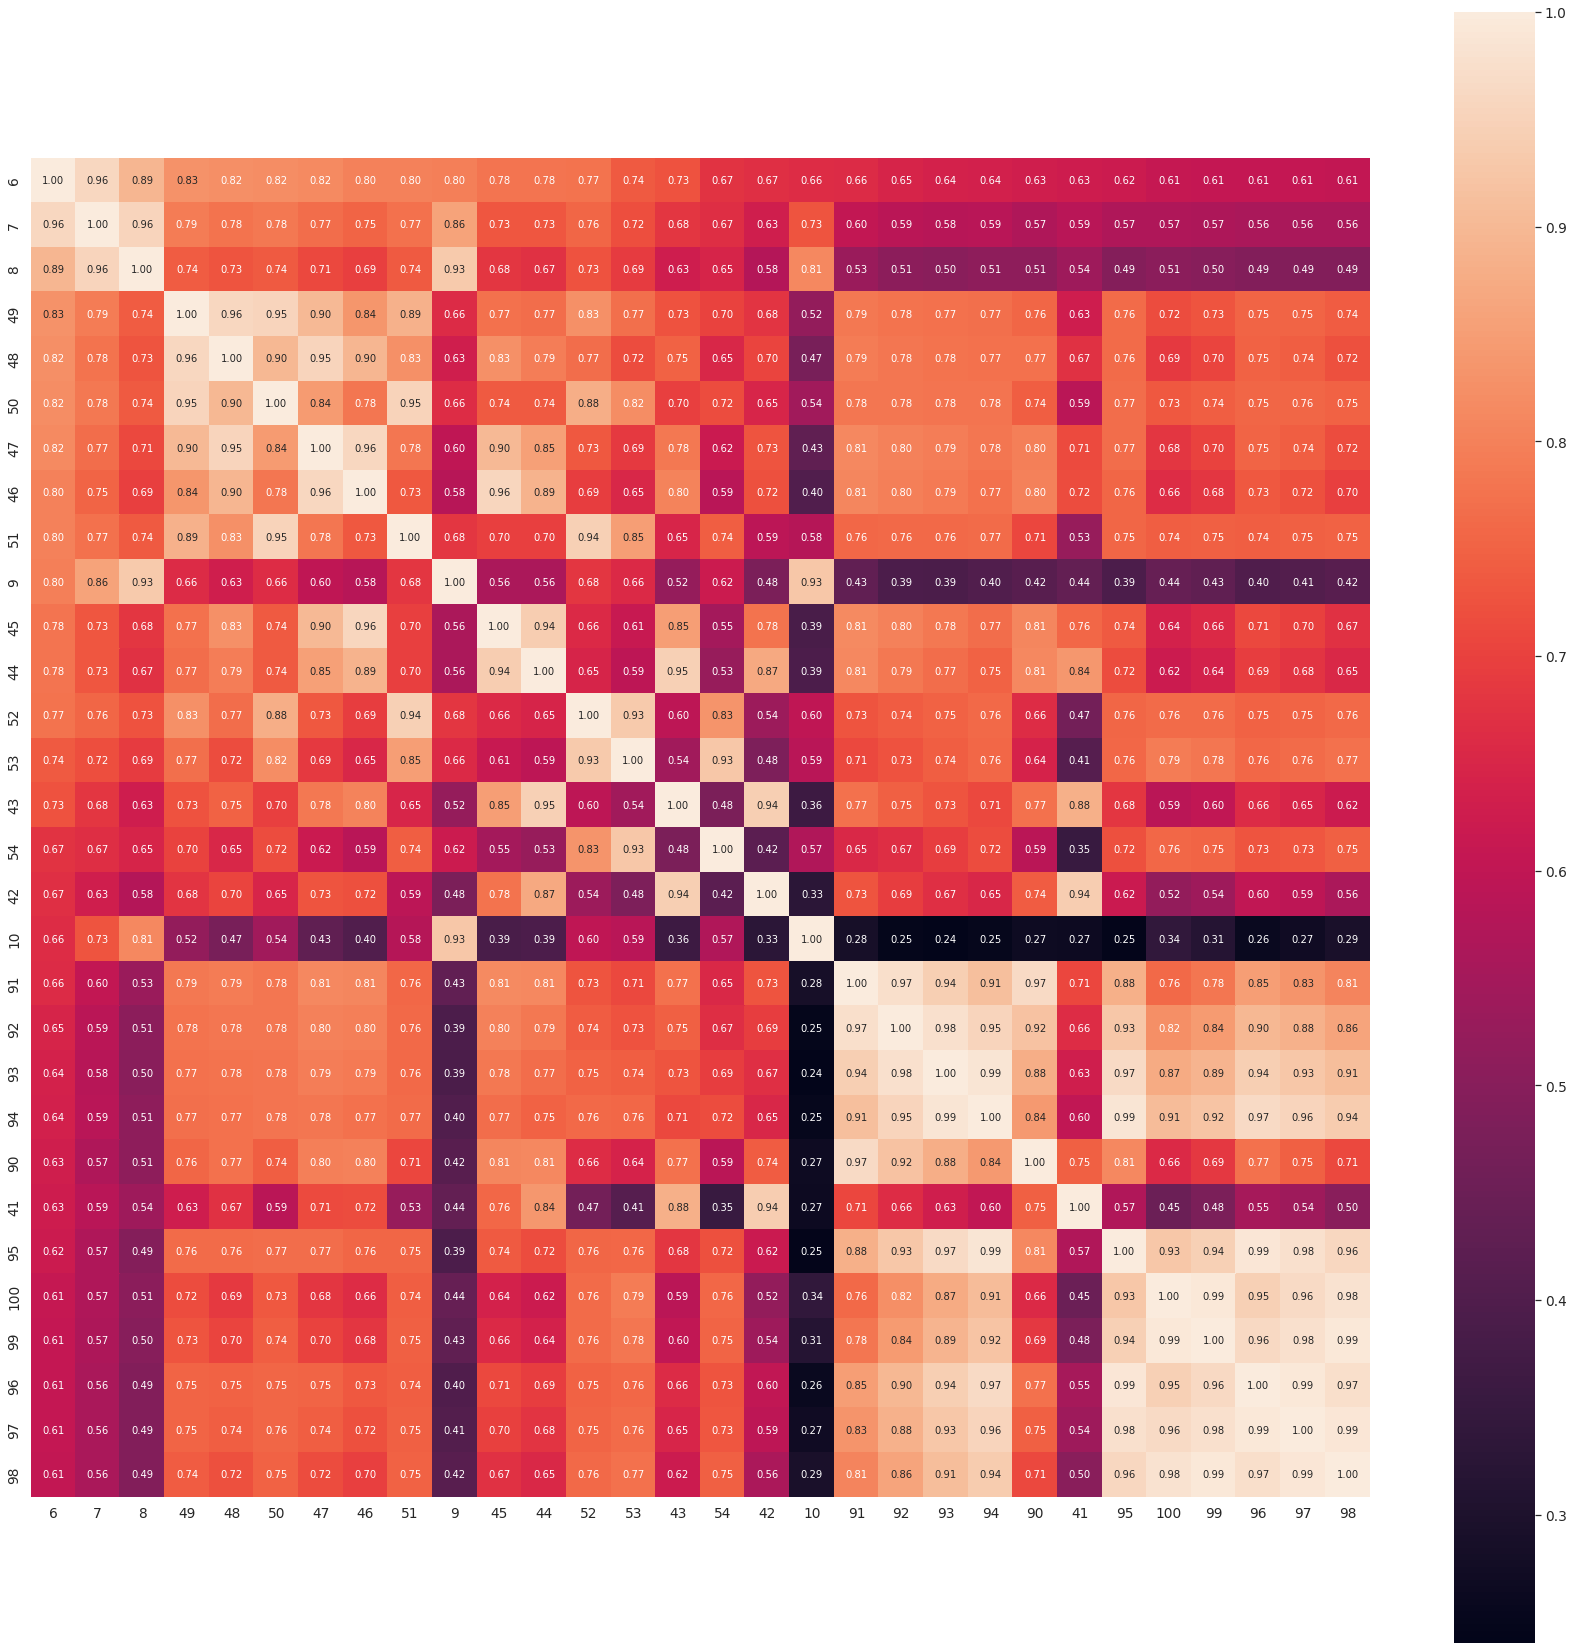

In [13]:
n = 30
columns = df_corr.nlargest(n, 6)[6].index
cm = np.corrcoef(df[columns].values.T)
plt.figure(figsize=(30,30))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()

In [14]:
df_A

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,...,3366,3367,3368,3369,3370,3371,3372,3373,3374,3375,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393,3394,3395,3396,3397,3398,3399,3400,3401,3402,3403,3404,3405
0,-0.001408,-0.001024,-0.001024,-0.001664,-0.002304,-0.001664,-0.001920,-0.001280,-0.000512,-0.000896,-0.001024,-0.000768,-0.001280,-0.001024,-0.001024,-0.001408,-0.002816,-0.002560,-0.000640,0.000128,0.002816,0.002304,0.000512,-0.000128,-0.000896,-0.001408,-0.002048,-0.001792,-0.001792,-0.001408,-0.001408,-0.001920,-0.001536,-0.001280,-0.001408,-0.001152,-0.000896,-0.001024,-0.000768,-0.000384,...,-0.005504,-0.007039,-0.008191,-0.009727,-0.009983,-0.010879,-0.011903,-0.012671,-0.012671,-0.012543,-0.012415,-0.012159,-0.012159,-0.011519,-0.011007,-0.010239,-0.009471,-0.007679,-0.006527,-0.004992,-0.002944,-0.001408,0.000384,0.001792,0.002688,0.004608,0.005632,0.007039,0.007679,0.008703,0.008831,0.009855,0.009727,0.009727,0.009599,0.009343,0.009343,0.008703,0.008447,0.007039
1,-0.000768,-0.000896,-0.000640,-0.000640,-0.000896,-0.001152,-0.001536,-0.002048,-0.001664,-0.001408,-0.001920,-0.001792,-0.001536,-0.001792,-0.001664,-0.002816,-0.002432,-0.000128,-0.000256,0.002688,0.001536,0.000640,-0.000128,-0.001280,-0.001664,-0.001920,-0.002048,-0.001536,-0.001024,-0.001536,-0.001536,-0.001280,-0.000896,-0.001792,-0.001664,-0.001920,-0.002048,-0.001536,-0.001664,-0.001792,...,-0.005248,-0.006911,-0.008191,-0.009087,-0.010111,-0.011263,-0.011263,-0.011519,-0.012031,-0.011903,-0.011903,-0.011775,-0.011647,-0.011775,-0.011263,-0.010111,-0.008191,-0.006527,-0.004992,-0.003456,-0.002176,-0.000384,0.001280,0.002560,0.003968,0.004864,0.005248,0.006271,0.006783,0.007423,0.008447,0.008191,0.008063,0.008319,0.008831,0.009215,0.008959,0.008319,0.007679,0.007039
2,-0.001792,-0.001792,-0.001280,-0.000768,-0.000896,-0.000640,-0.000384,-0.000896,-0.001408,-0.001664,-0.001920,-0.002048,-0.002048,-0.002304,-0.001536,-0.001152,-0.001024,-0.000768,-0.002048,-0.002304,-0.000384,0.000256,0.002944,0.001408,0.000128,-0.000512,-0.001152,-0.001664,-0.001536,-0.001536,-0.001664,-0.001280,-0.001536,-0.001792,-0.001664,-0.002304,-0.002432,-0.002048,-0.001792,-0.001536,...,-0.003840,-0.005760,-0.007423,-0.008447,-0.009727,-0.010367,-0.011135,-0.011903,-0.012927,-0.013311,-0.013311,-0.013183,-0.012671,-0.012287,-0.011647,-0.010751,-0.009471,-0.008959,-0.007935,-0.006527,-0.004736,-0.002944,-0.001024,0.000256,0.001664,0.003072,0.004352,0.005504,0.005632,0.006911,0.007807,0.009087,0.010239,0.010495,0.010367,0.010111,0.008959,0.008703,0.008447,0.007551
3,0.000000,-0.000128,-0.000384,-0.000896,-0.001152,-0.001408,-0.001792,-0.002304,-0.001920,-0.001536,-0.001664,-0.001664,-0.001408,-0.001280,-0.001024,-0.002304,-0.003456,-0.001280,-0.000768,0.000896,0.001152,0.000128,-0.001152,-0.001536,-0.001792,-0.001408,-0.001920,-0.002304,-0.001792,-0.001792,-0.001664,-0.001792,-0.001536,-0.002048,-0.001920,-0.001792,-0.001920,-0.001536,-0.001152,-0.001664,...,-0.004352,-0.004864,-0.006144,-0.007295,-0.008959,-0.010239,-0.011007,-0.011647,-0.011519,-0.011903,-0.012159,-0.012031,-0.011647,-0.011263,-0.010751,-0.009599,-0.008319,-0.006783,-0.006144,-0.004352,-0.003200,-0.002048,-0.001152,0.000128,0.001664,0.003200,0.003968,0.005120,0.006399,0.007295,0.008063,0.008959,0.009087,0.009599,0.009471,0.008831,0.008959,0.008575,0.007295,0.006911
4,-0.000512,-0.000640,-0.001280,-0.001536,-0.001536,-0.001408,-0.001280,-0.001408,-0.001024,-0.001152,-0.001024,-0.000896,-0.000768,-0.000768,-0.000512,-0.000512,-0.001408,-0.002688,-0.001408,-0.000768,0.001664,0.002048,0.000768,0.000512,-0.000256,-0.001408,-0.001408,-0.001920,-0.001920,-0.001024,-0.000896,-0.001024,-0.001280,-0.002048,-0.001664,-0.001536,-0.001920,-0.002560,-0.002304,-0.001920,...,-0.004224,-0.005248,-0.007039,-0.008319,-0.008959,-0.009471,-0.010367,-0.011007,-0.011903,-0.012031,-0.011519,-0.011263,-0.011135,-0.01023

In [15]:
# Calculation of minimum values for all echos
df_means = pd.DataFrame ()
df_means["Signal_A_mean"] = df_A.mean()
df_means["Signal_G_mean"] = df_G.mean()

In [16]:
df_means["Signal_A_mean"]

6      -0.001228
7      -0.001241
8      -0.001212
9      -0.001207
10     -0.001246
          ...   
3401    0.006436
3402    0.006264
3403    0.005913
3404    0.005505
3405    0.004928
Name: Signal_A_mean, Length: 3400, dtype: float64

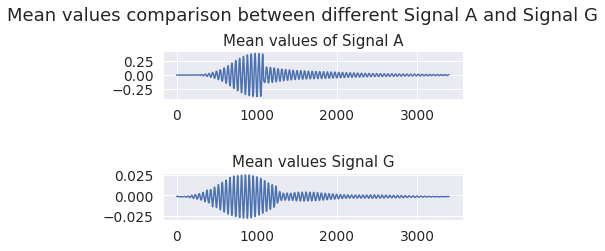

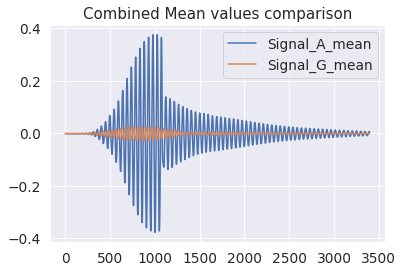

In [17]:
# get columns to plot
columns = df_means.columns
# create x data
x_data = range(0, df_means.shape[0])
# create figure and axis
fig, axs = plt.subplots(nrows=2, ncols=1)
fig.suptitle('Mean values comparison between different Signal A and Signal G')
fig.tight_layout(pad=3.0)
axs[0].plot(x_data, df_means["Signal_A_mean"], label="Signal_A_mean")
axs[0].set_title('Mean values of Signal A')
axs[1].plot(x_data, df_means["Signal_G_mean"], label="Signal_G_mean")
axs[1].set_title('Mean values Signal G')
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, df_means[column], label=column)
# set title and legend
ax.set_title('Combined Mean values comparison')
ax.legend()

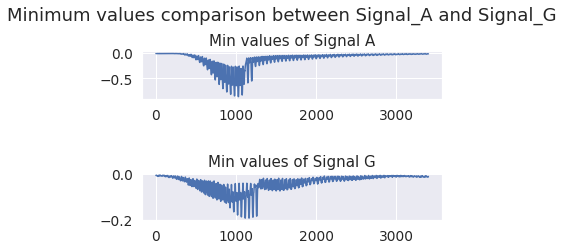

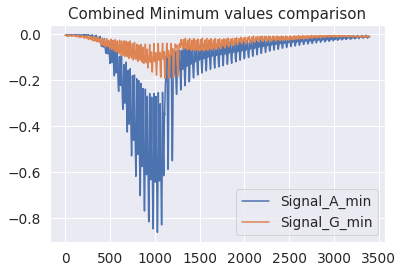

In [18]:
# Calculation of minimum values for all echos
df_mins = pd.DataFrame ()

df_mins["Signal_A_min"] = df_A.min()
df_mins["Signal_G_min"] = df_G.min()

# get columns to plot
columns = df_mins.columns
# create x data
x_data = range(0, df_mins.shape[0])
# create figure and axis
fig, axs = plt.subplots(nrows=2, ncols=1)
fig.suptitle('Minimum values comparison between Signal_A and Signal_G')
fig.tight_layout(pad=3.0)
axs[0].plot(x_data, df_mins["Signal_A_min"], label="Signal_A_min")
axs[0].set_title('Min values of Signal A')
axs[1].plot(x_data, df_mins["Signal_G_min"], label="Signal_G_min")
axs[1].set_title('Min values of Signal G')

fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, df_mins[column], label=column)
# set title and legend
ax.set_title('Combined Minimum values comparison')
ax.legend()

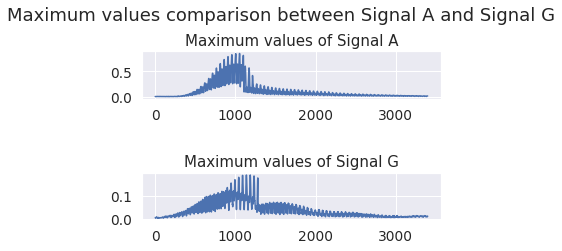

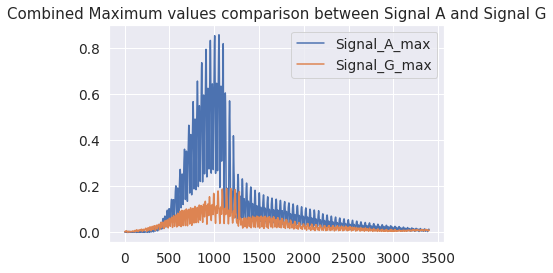

In [19]:
# Calculation of maximum values for all echos
df_maxs = pd.DataFrame ()

df_maxs["Signal_A_max"] = df_A.max()
df_maxs["Signal_G_max"] = df_G.max()

# get columns to plot
columns = df_maxs.columns
# create x data
x_data = range(0, df_maxs.shape[0])
# create figure and axis
fig, axs = plt.subplots(nrows=2, ncols=1)
fig.suptitle('Maximum values comparison between Signal A and Signal G')
fig.tight_layout(pad=3.0)
axs[0].plot(x_data, df_maxs["Signal_A_max"], label="Signal A")
axs[0].set_title('Maximum values of Signal A')
axs[1].plot(x_data, df_maxs["Signal_G_max"], label="Signal G")
axs[1].set_title('Maximum values of Signal G')

fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, df_maxs[column], label=column)
# set title and legend
ax.set_title('Combined Maximum values comparison between Signal A and Signal G')
ax.legend()

## Dataset Preprocessing 

In [20]:
df_A["class"] = 0
df_G["class"] = 1

In [21]:
df = df_A.append(df_G, ignore_index = True) 

In [22]:
df.describe()

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,...,3367,3368,3369,3370,3371,3372,3373,3374,3375,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393,3394,3395,3396,3397,3398,3399,3400,3401,3402,3403,3404,3405,class
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,...,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,-0.001342,-0.001308,-0.001238,-0.001184,-0.001134,-0.001064,-0.001038,-0.001027,-0.001000,-0.001013,-0.001058,-0.001030,-0.001018,-0.001040,-0.001040,-0.001048,-0.001106,-0.001184,-0.001232,-0.001232,-0.001182,-0.001094,-0.001067,-0.001197,-0.001304,-0.001411,-0.001560,-0.001593,-0.001589,-0.001572,-0.001573,-0.001530,-0.001531,-0.001543,-0.001437,-0.001387,-0.001387,-0.001389,-0.001403,-0.001423,...,-0.002393,-0.002795,-0.003220,-0.003582,-0.003865,-0.004150,-0.004434,-0.004623,-0.004742,-0.004779,-0.004714,-0.004611,-0.004531,-0.004380,-0.004159,-0.003893,-0.003588,-0.003245,-0.002866,-0.002409,-0.001973,-0.001513,-0.001045,-0.000595,-0.000171,0.000238,0.000618,0.000974,0.001271,0.001506,0.001700,0.001865,0.001911,0.001958,0.001955,0.001918,0.001781,0.001591,0.001378,0.571429
std,0.001724,0.001650,0.001525,0.001426,0.001381,0.001419,0.001451,0.001488,0.001508,0.001597,0.001622,0.001690,0.001800,0.001917,0.001972,0.002013,0.002095,0.002117,0.002076,0.002006,0.001998,0.002037,0.002051,0.001915,0.001784,0.001695,0.001562,0.001470,0.001438,0.001423,0.001471,0.001539,0.001660,0.001683,0.001698,0.001760,0.001831,0.001833,0.001840,0.001926,...,0.004526,0.004650,0.004795,0.005002,0.005240,0.005469,0.005665,0.005869,0.006028,0.006166,0.006272,0.006335,0.006316,0.006225,0.006014,0.005823,0.005617,0.005329,0.005052,0.004879,0.004657,0.004480,0.004371,0.004339,0.004364,0.004468,0.004642,0.004806,0.005078,0.005353,0.005602,0.005790,0.005953,0.006075,0.006158,0.006179,0.006167,0.006173,0.005991,0.495580
min,-0.007551,-0.007679,-0.007551,-0.006783,-0.006144,-0.006783,-0.006783,-0.006783,-0.007039,-0.007039,-0.006911,-0.007679,-0.008319,-0.009087,-0.009727,-0.009727,-0.010239,-0.009727,-0.009087,-0.008831,-0.009215,-0.009855,-0.010239,-0.010879,-0.011007,-0.011007,-0.010111,-0.009727,-0.009087,-0.008703,-0.008319,-0.008319,-0.007807,-0.007807,-0.007167,-0.007295,-0.007551,-0.008447,-0.008447,-0.008191,...,-0.012543,-0.011903,-0.011903,-0.012927,-0.014079,-0.014847,-0.015231,-0.015615,-0.016255,-0.016255,-0.017023,-0.018047,-0.018302,-0.018815,-0.018687,-0.018174,-0.017151,-0.017151,-0.016511,-0.015999,-0.014591,-0.013823,-0.012799,-0.013055,-0.013311,-0.013055,-0.013695,-0.013311,-0.013567,-0.014207,-0.014079,-0.014975,-0.014335,-0.013695,-0.013439,-0.012799,-0.012415,-0.012799,-0.013055,0.000000
25%,-0.002432,-0.002304,-0.002048,-0.001920,-0.001664,-0.001664,-0.001664,-0.001664,-0.001664,-0.001664,-0.001792,-0.001792,-0.001920,-0.001920,-0.001792,-0.001760,-0.001920,-0.002016,-0.002176,-0.002048,-0.001920,-0.001792,-0.001920,-0.001920,-0.002048,-0.002176,-0.002304,-0.002272,-0.002144,-0.002304,-0.002304,-0.002304,-0.002560,-0.002560,-0.002432,-0.002400,-0.002432,-0.002432,-0.002432,-0.002304,...,-0.005504,-0.006527,-0.007295,-0.008191,-0.008959,-

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Columns: 3401 entries, 6 to class
dtypes: float64(3400), int64(1)
memory usage: 9.1 MB


In [24]:
y = df["class"]

In [25]:
X = df.drop(columns = "class")

In [26]:
X

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,...,3366,3367,3368,3369,3370,3371,3372,3373,3374,3375,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393,3394,3395,3396,3397,3398,3399,3400,3401,3402,3403,3404,3405
0,-0.001408,-0.001024,-0.001024,-0.001664,-0.002304,-0.001664,-0.001920,-0.001280,-0.000512,-0.000896,-0.001024,-0.000768,-0.001280,-0.001024,-0.001024,-0.001408,-0.002816,-0.002560,-0.000640,0.000128,0.002816,0.002304,0.000512,-0.000128,-0.000896,-0.001408,-0.002048,-0.001792,-0.001792,-0.001408,-0.001408,-0.001920,-0.001536,-0.001280,-0.001408,-0.001152,-0.000896,-0.001024,-0.000768,-0.000384,...,-0.005504,-0.007039,-0.008191,-0.009727,-0.009983,-0.010879,-0.011903,-0.012671,-0.012671,-0.012543,-0.012415,-0.012159,-0.012159,-0.011519,-0.011007,-0.010239,-0.009471,-0.007679,-0.006527,-0.004992,-0.002944,-0.001408,0.000384,0.001792,0.002688,0.004608,0.005632,0.007039,0.007679,0.008703,0.008831,0.009855,0.009727,0.009727,0.009599,0.009343,0.009343,0.008703,0.008447,0.007039
1,-0.000768,-0.000896,-0.000640,-0.000640,-0.000896,-0.001152,-0.001536,-0.002048,-0.001664,-0.001408,-0.001920,-0.001792,-0.001536,-0.001792,-0.001664,-0.002816,-0.002432,-0.000128,-0.000256,0.002688,0.001536,0.000640,-0.000128,-0.001280,-0.001664,-0.001920,-0.002048,-0.001536,-0.001024,-0.001536,-0.001536,-0.001280,-0.000896,-0.001792,-0.001664,-0.001920,-0.002048,-0.001536,-0.001664,-0.001792,...,-0.005248,-0.006911,-0.008191,-0.009087,-0.010111,-0.011263,-0.011263,-0.011519,-0.012031,-0.011903,-0.011903,-0.011775,-0.011647,-0.011775,-0.011263,-0.010111,-0.008191,-0.006527,-0.004992,-0.003456,-0.002176,-0.000384,0.001280,0.002560,0.003968,0.004864,0.005248,0.006271,0.006783,0.007423,0.008447,0.008191,0.008063,0.008319,0.008831,0.009215,0.008959,0.008319,0.007679,0.007039
2,-0.001792,-0.001792,-0.001280,-0.000768,-0.000896,-0.000640,-0.000384,-0.000896,-0.001408,-0.001664,-0.001920,-0.002048,-0.002048,-0.002304,-0.001536,-0.001152,-0.001024,-0.000768,-0.002048,-0.002304,-0.000384,0.000256,0.002944,0.001408,0.000128,-0.000512,-0.001152,-0.001664,-0.001536,-0.001536,-0.001664,-0.001280,-0.001536,-0.001792,-0.001664,-0.002304,-0.002432,-0.002048,-0.001792,-0.001536,...,-0.003840,-0.005760,-0.007423,-0.008447,-0.009727,-0.010367,-0.011135,-0.011903,-0.012927,-0.013311,-0.013311,-0.013183,-0.012671,-0.012287,-0.011647,-0.010751,-0.009471,-0.008959,-0.007935,-0.006527,-0.004736,-0.002944,-0.001024,0.000256,0.001664,0.003072,0.004352,0.005504,0.005632,0.006911,0.007807,0.009087,0.010239,0.010495,0.010367,0.010111,0.008959,0.008703,0.008447,0.007551
3,0.000000,-0.000128,-0.000384,-0.000896,-0.001152,-0.001408,-0.001792,-0.002304,-0.001920,-0.001536,-0.001664,-0.001664,-0.001408,-0.001280,-0.001024,-0.002304,-0.003456,-0.001280,-0.000768,0.000896,0.001152,0.000128,-0.001152,-0.001536,-0.001792,-0.001408,-0.001920,-0.002304,-0.001792,-0.001792,-0.001664,-0.001792,-0.001536,-0.002048,-0.001920,-0.001792,-0.001920,-0.001536,-0.001152,-0.001664,...,-0.004352,-0.004864,-0.006144,-0.007295,-0.008959,-0.010239,-0.011007,-0.011647,-0.011519,-0.011903,-0.012159,-0.012031,-0.011647,-0.011263,-0.010751,-0.009599,-0.008319,-0.006783,-0.006144,-0.004352,-0.003200,-0.002048,-0.001152,0.000128,0.001664,0.003200,0.003968,0.005120,0.006399,0.007295,0.008063,0.008959,0.009087,0.009599,0.009471,0.008831,0.008959,0.008575,0.007295,0.006911
4,-0.000512,-0.000640,-0.001280,-0.001536,-0.001536,-0.001408,-0.001280,-0.001408,-0.001024,-0.001152,-0.001024,-0.000896,-0.000768,-0.000768,-0.000512,-0.000512,-0.001408,-0.002688,-0.001408,-0.000768,0.001664,0.002048,0.000768,0.000512,-0.000256,-0.001408,-0.001408,-0.001920,-0.001920,-0.001024,-0.000896,-0.001024,-0.001280,-0.002048,-0.001664,-0.001536,-0.001920,-0.002560,-0.002304,-0.001920,...,-0.004224,-0.005248,-0.007039,-0.008319,-0.008959,-0.009471,-0.010367,-0.011007,-0.011903,-0.012031,-0.011519,-0.011263,-0.011135,-0.01023

In [27]:
y

0      0
1      0
2      0
3      0
4      0
      ..
345    1
346    1
347    1
348    1
349    1
Name: class, Length: 350, dtype: int64

## Dataset Scaling

## Train Test split 

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense,TimeDistributed,Conv1D,MaxPooling1D,Flatten

In [29]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y.values)

le.classes_

y1 = le.transform(y.values)


In [30]:
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [31]:
y.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y1,test_size=.2)

In [33]:
X_train.shape

(280, 3400)

In [34]:
X_train= np.reshape(X_train,(X_train.shape[0], 1, X_train.shape[1]))
y_train= np.reshape(y_train,(y_train.shape[0], 1, 1))
X_test= np.reshape(X_test,(X_test.shape[0], 1, X_test.shape[1]))
y_test= np.reshape(y_test,(y_test.shape[0], 1, 1))

In [35]:
"""verbose, epochs, batch_size = True, 15, 16
n_steps, n_length = 40, 10
n_signals = 1"""
model = Sequential()
"""
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, input_dim=X_train.shape[2], activation='relu'), input_shape=(None,n_length,n_signals)))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, input_dim=X_train.shape[2], activation='relu')))
model.add(TimeDistributed(Dropout(0.5, input_dim=X_train.shape[2])))
model.add(TimeDistributed(MaxPooling1D(pool_size=2, input_dim=X_train.shape[2])))
model.add(TimeDistributed(Flatten()))
"""
model.add(LSTM(100, input_dim=X_train.shape[2]))
model.add(Dropout(0.5))             # Regularization
#model.add(Dense(60, input_dim=X_train.shape[2], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               1400400   
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 30)                3030      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 1,403,461
Trainable params: 1,403,461
Non-trainable params: 0
_________________________________________________________________


In [36]:
history = model.fit(X_train, y_train, validation_split=0.20, epochs = 7, batch_size = 32)

Epoch 1/7
7/7 [==============================] - 3s 129ms/step - loss: 0.5577 - accuracy: 0.6741 - val_loss: 0.5232 - val_accuracy: 0.7143
Epoch 2/7
7/7 [==============================] - 0s 17ms/step - loss: 0.4531 - accuracy: 0.7812 - val_loss: 0.4540 - val_accuracy: 0.7143
Epoch 3/7
7/7 [==============================] - 0s 17ms/step - loss: 0.3959 - accuracy: 0.8170 - val_loss: 0.3898 - val_accuracy: 0.8750
Epoch 4/7
7/7 [==============================] - 0s 17ms/step - loss: 0.3490 - accuracy: 0.8973 - val_loss: 0.3399 - val_accuracy: 0.8750
Epoch 5/7
7/7 [==============================] - 0s 20ms/step - loss: 0.2950 - accuracy: 0.9196 - val_loss: 0.2943 - val_accuracy: 0.8929
Epoch 6/7
7/7 [==============================] - 0s 20ms/step - loss: 0.2431 - accuracy: 0.9375 - val_loss: 0.2529 - val_accuracy: 0.9107
Epoch 7/7
7/7 [==============================] - 0s 18ms/step - loss: 0.2110 - accuracy: 0.9509 - val_loss: 0.2238 - val_accuracy: 0.9643


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


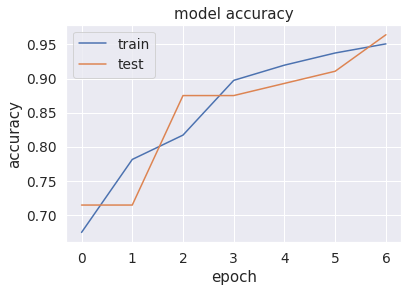

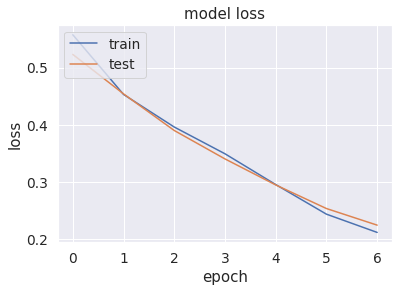

In [37]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
y_hat = model.predict(X_test)
y_hat[y_hat<0.5] = 0
y_hat[y_hat>0.5] = 1

In [39]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 97.14%


In [40]:
y_hat1 = y_hat.reshape(1, -1)
y_hat1[0]

array([0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 0.], dtype=float32)

In [41]:
y_test1 = y_test.reshape(1, -1)
y_test1[0]

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1])

In [42]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test1[0], y_hat1[0], target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.95      1.00      0.97        36
     class 1       1.00      0.94      0.97        34

    accuracy                           0.97        70
   macro avg       0.97      0.97      0.97        70
weighted avg       0.97      0.97      0.97        70



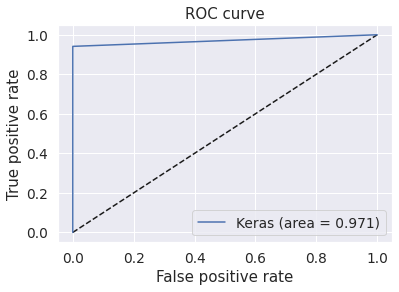

In [43]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test1[0], y_hat1[0])
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()